<a href="https://colab.research.google.com/github/rcolo88/Machine-Learning-HW1/blob/main/HW1_RobertCologero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
## Homework guideline
- The deadline is Sep 28th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [1]:
%pylab inline 
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Q1: Low rank approximation (25pt)
In class we discussed SVD can be used to help matrix low rank approximation. Say the square matrix $X\in \mathbb{R}^{n\times n}$, the SVD for the matrix $X$ is $X = \sum_{i=1}^{n} \sigma_i u_i v_i^\top$. Let's explore this with the following image example. This is a very famous photo and many used it as the test example. 



---


### 1. load data

You don't need to do anything in this part. Feel free to comment. 

(256, 256)
256


Text(0.5, 1.0, 'Matrix $X$ encoding a Grayscale Image\n(Rank, $r=$256)')

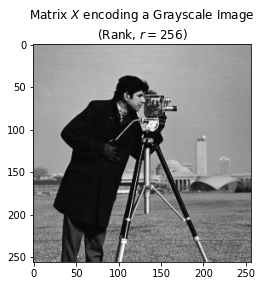

In [2]:
img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW1/cameraman.png?raw=true')
# we don't want to work on tensor. Let's turn it into a matrix 
# encode RGBa image as matrix of intensities, X
R = img[::, ::, 0]
G = img[::, ::, 1]
B = img[::, ::, 2] 
X = 0.2989 * R + 0.5870 * G + 0.1140 * B
X_rank = LA.matrix_rank(X, 0.)

# here are some basic information
print(X.shape)
print(X_rank)

# Let's look at this image in grayscale. 
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${X_rank})")



---
### 2. Plot Singular Values (5pt)
Perform the singular value decomposition and plot the singular values of this matrix in descending order. Print out top 20 singular values. 
Please comment your findings. Note this is very important in image compression. 



[125.62039    28.349152   21.47399    12.18815    11.506297    9.482795
   9.04048     7.1393657   6.609029    6.1967845   6.0150127   5.844142
   5.631469    5.5854716   5.0064387   4.692855    4.478231    4.381007
   3.9015408   3.8644621]


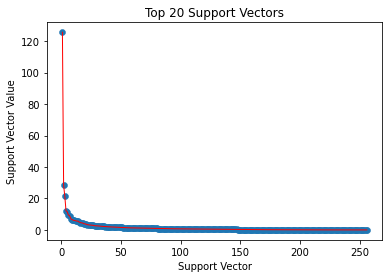

In [3]:
## Your code starts here
#Cameraman SVD
U, S, V = LA.svd(X)
S.sort()
S =S[::-1]
x_variable = range(1,len(S)+1)

#Graph for all SVD values
plt.scatter(x_variable,S,linewidth = .5)
plt.plot(x_variable,S,color='red',linewidth = 1)
plt.title('Top 20 Support Vectors')
plt.xlabel('Support Vector')
plt.ylabel('Support Vector Value')


#Printing out top 20 SVD values
print(S[:20])



## **Your Answer**:
The first singular value of ~125 is the largest value by a wide margin (about 100), this means that it is extremely important in the rank compression. The first 5 values are all double digits and when used can roughly resemble the original image which means the rank of 256 can be dropped down substantially while still retaining likeness to the original.



---


### 3. Low rank approximation (10pt)

Find low rank approximation for the matrix $X$ with the rank 4, 8, and 16, $\hat{X}_4, \hat{X}_8, \hat{X}_{16}$. You don't need to print out the matrix, instead you can use _imshow_ to show the matrix in the image form, like I did in the first part. Please comment the quality of these image and the **compression rate**(Feel free to ask me if you don't know). 

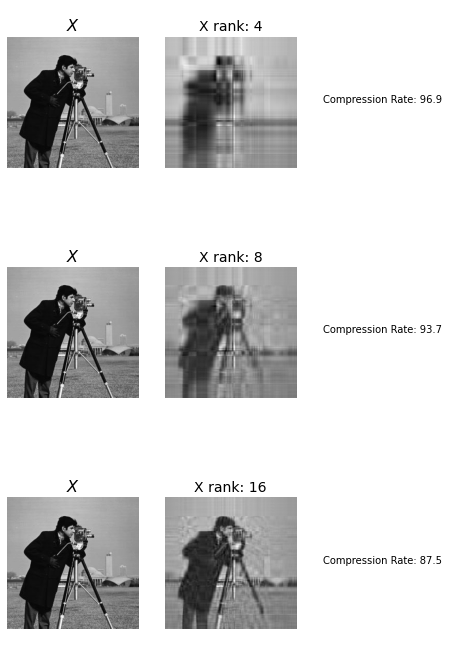

In [4]:
## Your code starts here
# Establish N as global value 
N = 3
fig, ax = plt.subplots(N, 3, figsize=(8, 12)) #subplots of size Nx3 (3x3)
plt.sca(ax[0][0]) #assign origianl image to first row first column
plt.imshow(X, cmap='gray')
plt.axis(False)
plt.title("$X$", fontsize=16)


# Using for loop to parse through required rank and reconstruct respective matrix image
for power in range(1, N+1):
    rank = 2 ** (1 + power)

    # reconstructs image up to respective rank 
    L = (U[:, :rank] * S[:rank]) 
    v=(V[:rank,:])
    X_reconstruction = np.dot(L,v)

    # Compression rate calculated by comparing size of new matrices with original 
    rank_data_compression =  100*(1-(  U[:, :rank].size + S[:rank].size + V[:rank,:].size) / X.size)


    # Original X for comparison
    if power > 1:
        plt.sca(ax[power-1][0])
        plt.imshow(X, cmap='gray')
        plt.axis(False)
        plt.title("$X$", fontsize=16)

    # New Image
    plt.sca(ax[power-1][1])
    plt.imshow(X_reconstruction, cmap='gray')
    plt.axis(False)
    plt.title(f'X rank: {rank:1.0f}', fontsize=14)

   

    # Compression Rate
    plt.sca(ax[power-1][2])
    compression_text = f'Compression Rate: {rank_data_compression:1.1f}' 
    plt.text( .007,.5,compression_text)
    plt.axis(False)
    


## **Your Answer**:
The quality increases as the rank of the matrix grows, however we can still roughly make out the image even at a rank as low as 4 because the first 4 SVD are so large and contain so much of the image data.



---


### 4. Residue (10pt)
Print out the 2-norm of the residue for the low rank approximation. It is defined as $\|X-\hat{X}\|_2$. Compare these 2-norm of the residue with the singular values of the matrix $X$. Please comment on your findings.  

**Optional problem**: What if I change 2-norm to frobenius norm? 

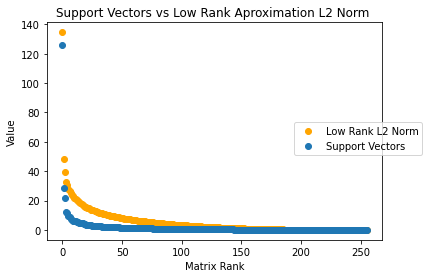

In [5]:
## Your code starts here
# can also use LA.norm() but decided to make own function

# returns l2 norm of approximated matrix, input is rank 
def l2_residue_rank(a):
  L = (U[:, :a] * S[:a]) 
  v=(V[:a,:])
  X_hat = np.dot(L,v)
  x_diff = X-X_hat
  square=x_diff**2
  out= sum(square)**0.5
  return out

# initializing list to create y variable to represent x_hat matrix rank
l2_pnts=[]
for i in range(0,(int(X.size**.5))):
  l2_pnts.append(l2_residue_rank(i))

# graph the SVD vs L2 norm 
x_var=range(0,int(X.size**.5),1)
plt.title('Support Vectors vs Low Rank Aproximation L2 Norm ')
plt.scatter(x_var,l2_pnts,color='orange')
plt.scatter(x_var,S)
plt.xlabel('Matrix Rank')
plt.ylabel('Value')
plt.figlegend(('Low Rank L2 Norm','Support Vectors'),loc='right')





## **Your Answer**:




---


## Q2:Monty Hall Problem (15pt)
Imagine a game show with the following rules: There are three doors, labelled 1, 2, 3. A single prize (e.g., a car) has been hidden behind one of them. You get to select one door. Then the gameshow host opens one of the other two doors (not the one you picked), in such a way as to not reveal the prize location. At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you
will receive whatever is behind your final choice of door.

For example, suppose you choose door 3, and the gameshow host opens door 1, revealing nothing behind the door, as promised. Should you (a) stick with door 3, or (b) switch to door 2, or (c) does it make no difference?

Please justify your answer in **your own language**.

## **Your Answer**: 
You (I) should switch the door because my chances of winning have gone up 1/3 or 33.33% due to variable change. This is because the host reveals a door which does not have the prize and is not yours. We can refer to the table below for evidence of this; even if we pick the same door everytime, our chances of winning double by switching.





In [6]:
import pandas as pd
data = {'Door 1':['Car','Empty','Empty'],'Door 2':['Empty','Car','Empty'],'Door 3':['Empty','Empty','Car'],'You Choose':['1','1','1'],'Host Chooses':['2','3','2'],'Stay':['win','lose','lose'],'Switch':['lose','win','win']}
df = pd.DataFrame(data,index=['Game 1','Game 2', 'Game 3'])
print(df)

       Door 1 Door 2 Door 3 You Choose Host Chooses  Stay Switch
Game 1    Car  Empty  Empty          1            2   win   lose
Game 2  Empty    Car  Empty          1            3  lose    win
Game 3  Empty  Empty    Car          1            2  lose    win




---


# Q3:Prostate Cancer (35pt)
**Background**: The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy.
The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

|         |                                                       |
|---------|-------------------------------------------------------|
|lpsa     |log prostate specific antigen                          |
|lcavol   |log cancer volume                                      |
|lweight  |log prostate weight                                    |
|age      |age                                                    |
|lbph     |log of benign prostatic hyperplasia amount             |
|svi      |seminal vesicle invasion                               |
|lcp      |log of capsular penetration                            |
|gleason  |Gleason score                                          |
|pgg45    |percent of Gleason scores 4 or 5                       |



---


### 1.Load and Prepare Data

The following code loads the the prostate cancer data set. You can see there are 8 features and 97 cases. We divide the dataset into two parts: the 67 cases as training set (in Xtrain and ytrain) and the 30 cases as test set (in Xtest and ytest). You don't need to do anything in this part.

In [7]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true -O prostateStnd.mat
data = loadmat('prostateStnd.mat')
names = list(map(lambda x: x[0], data['names'][0]))
Xtrain, ytrain = data['Xtrain'], data['ytrain']
Xtest, ytest   = data['Xtest'], data['ytest']
print(names)
print(Xtrain.shape)
print(Xtest.shape)


--2022-06-23 18:36:38--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat [following]
--2022-06-23 18:36:38--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat [following]
--2022-06-23 18:36:39--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con



---



### 2. Coefficient of Determination (5pt)
Please write a function to calculate **Coefficient of Determination**
$$ R^2= 1- \frac{\sum_{n=1}^N(\hat{y}_n-y_n)^2}{\sum_{n=1}^N(\bar{y}-y_n)^2}$$

In [8]:
def r2_score(ytrue, ypred):
  numerator = sum((ypred-ytrue)**2)
  denominator = sum((mean(ytrue)-ytrue)**2)
  return 1-(numerator/denominator)
  



---


### 3. Least Square (10pt)

Please perform the linear regression with least squares. Use the function defined above to calculate coefficient of determination.
Use this model to calculate the RSS(residual sum of squares) on the test set. Do you think we have the overfitting issue?

[[ 2.47951205]
 [ 0.67601634]
 [ 0.30336522]
 [-0.14073374]
 [ 0.20906052]
 [ 0.30362332]
 [-0.28700184]
 [-0.02119493]
 [ 0.26557614]]
R-squared for test set and predicted values: 0.4414014941560528
RSS test: 8.794937561982353
RSS train: 14.713192229954203


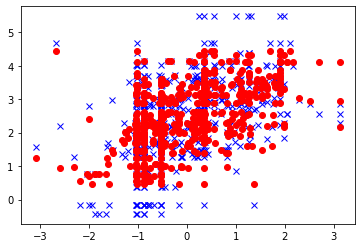

In [9]:
# Your code starts here. You may use the functions defined in class.
# Creating yhat for training set
# Training model (w) on training set
X = np.ones((67,9))
X[:,1:9]=Xtrain
q, r = linalg.qr(X);
w = linalg.solve(r, q.T.dot(ytrain))
print(w)
yHat = X.dot(w)
y_residue = ytrain - yHat
plot(Xtrain,ytrain,'bx');
plot(Xtrain,yHat,'ro');


# creating new yhat for test set
X1 = np.ones((30,9))
X1[:,1:9]=Xtest
yHat1 = X1.dot(w)
y_residue1 = ytest - yHat1

# R squared on test and predicted values
print('R-squared for test set and predicted values: '+str(r2_score(ytest,yHat1)))

# RSS on test set
def RSS(y_residue):
  return 1/2 * np.sum(y_residue**2)

print('RSS test: '+str(RSS(y_residue1)))
print('RSS train: '+str(RSS(y_residue)))




## **Your Answer**:
Despite a low RSS, I do believe there is an overfitting issue possibly from too many variables.



---


### 4. Ridge Regression (10pt)

Please perform the Ridge regression. Use the RSS on the test data to find the optimal penalty parameter $\lambda$. Also calculate coefficient of determination. Compare with the least square, do you have any improvement? 

(76, 9)
[ 2.44163069  0.65303304  0.2975064  -0.12685798  0.20677353  0.29950335
 -0.26042777 -0.02145813  0.25732148]
Ridge RSS : 8.73467184202113
R-squared for test set and predicted values: 0.4452291894508401
min of RSS in \lambda is 8.730006632967093
optimal \lambda is  1.411764705882353
[ 2.42635982  0.64420236  0.29516766 -0.12144748  0.20581907  0.29791431
 -0.25042748 -0.02162396  0.25431891]


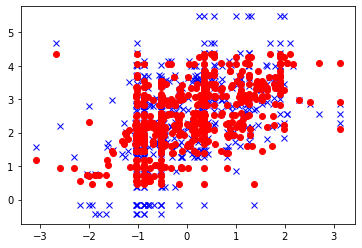

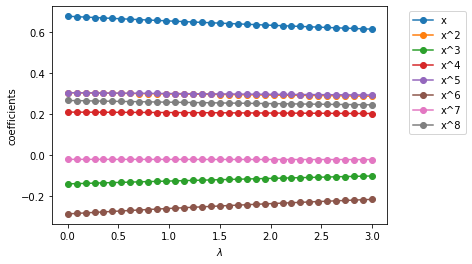

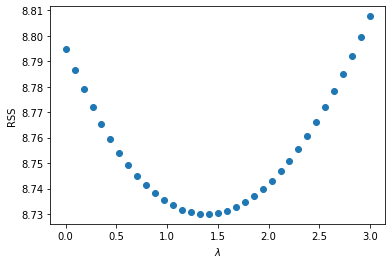

In [10]:
############################################################################
# This Ridge regression was run using lamda = 1
l = 1; # lambda=1
sq_Lambda = diag(ones(9)*sqrt(l)) 

X4_tilde = np.vstack([X, sq_Lambda]) # X is already in this form 
y_tilde  = append(ytrain, zeros(9))

print(X4_tilde.shape)

# use the lease square result
H4_tilde = dot(X4_tilde,linalg.pinv(X4_tilde))
yHatQ4_tilde = dot(H4_tilde,y_tilde)

plot(Xtrain,ytrain,'bx'); plot(Xtrain,yHatQ4_tilde[0:ytrain.size],'ro');


q, r = linalg.qr(X4_tilde);
w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
print(w4_tilde)
w4_new=np.array([w4_tilde])

yHat4_tilde_test = X1.dot(w4_new.T)
print('Ridge RSS :', RSS(ytest - yHat4_tilde_test))

# R squared on test and predicted values
yhat4 = array([yHat4_tilde_test])
print('R-squared for test set and predicted values: '+str(r2_score(ytest,yhat4.T)))

l_span   = linspace(0,3,35) 
w4_store = zeros((35, 9))
error_store = zeros(35)

# X4_tilde is the same as X 
for index in range(len(l_span)):
  l         = l_span[index]
  sq_Lambda = diag(ones(9)*sqrt(l)) 
  X4_tilde  = np.vstack([X, sq_Lambda])
  y_tilde   = append(ytrain, zeros(9))
  q, r       = linalg.qr(X4_tilde);
  w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
  w4_new = np.array([w4_tilde])
  w4_store[index,:] = w4_new
  yHat4_tilde_test = X1.dot(w4_new.T) 
  error_store[index] = RSS(ytest - yHat4_tilde_test)

# regularization path plot
fig, ax = plt.subplots()
#ax.plot(l_span, w4_store[:,0],'-o',label='intercept')
ax.plot(l_span, w4_store[:,1],'-o',label='x')
ax.plot(l_span, w4_store[:,2],'-o',label='x^2')
ax.plot(l_span, w4_store[:,3],'-o',label='x^3')
ax.plot(l_span, w4_store[:,4],'-o',label='x^4')
ax.plot(l_span, w4_store[:,5],'-o',label='x^5')
ax.plot(l_span, w4_store[:,6],'-o',label='x^6')
ax.plot(l_span, w4_store[:,7],'-o',label='x^7')
ax.plot(l_span, w4_store[:,8],'-o',label='x^8')
leg = ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
ylabel('coefficients')
xlabel('$\lambda$')

# Plot for Ridge RSS
fig, ax = plt.subplots()
ax.scatter(l_span, error_store)
ylabel('RSS')
xlabel('$\lambda$')
print('min of RSS in \lambda is', min(error_store)) # note with 
print('optimal \lambda is ', l_span[argmin(error_store)])
print(w4_store[argmin(error_store),:])


## **Your Answer**:
There is a slight improvement with the correlation of determination but hardly noticeable.



---


### 5. LASSO (10pt)

Please test LASSO with different choices of $\lambda$, plot the regularization path, i.e, the coefficients vs the $\lambda$ for each **feature**. Please use this path to perform the **feature selection**, then re-estimate the chosen coefficients using least squares (**debiasing**). 



Number of iteration is  1
Number of iteration is  21
Number of iteration is  22
Number of iteration is  22
Number of iteration is  17
Number of iteration is  16
Number of iteration is  16
Number of iteration is  16
Number of iteration is  15
Number of iteration is  15
Number of iteration is  15
Number of iteration is  15
Number of iteration is  15
Number of iteration is  15
Number of iteration is  15
Number of iteration is  14
Number of iteration is  14
Number of iteration is  12
Number of iteration is  13
Number of iteration is  14
Number of iteration is  14
Number of iteration is  14
Number of iteration is  14
Number of iteration is  14
Number of iteration is  14
Number of iteration is  14
Number of iteration is  8
Number of iteration is  7
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of iteration is  6
Number of ite

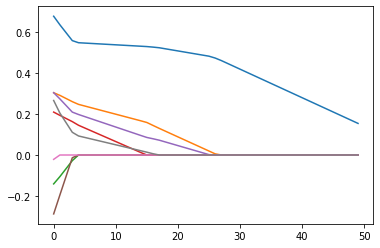

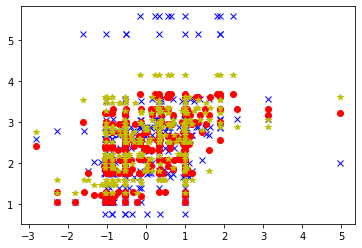

In [11]:

# LASSO Function
def lasso(X, y, l1, tol=1e-6):

  """The Lasso Regression model
      Pathwise coordinate descent with co-variance updates is applied.

      X - NumPy matrix, size (N, d), of standardized numerical predictors, note the first column is ones.
      y - NumPy array, length N, of numerical response.
      l1 - L1 penalty tuning parameter (positive scalar)
      tol - Coordinate Descent convergence tolerance (exited if change < tol)

  """
  m, n      = np.shape(X)
  q, r      = linalg.qr(X);
  w_s       = linalg.solve(r, q.T.dot(y))
  iter   = 0
  while True:
      w_star = w_s.copy()
      for j in range(n):
       # norm_X_j = LA.norm(X[:, j])
       # selector = [i for i in range(X.shape[1]) if i != j]
       # a = X[:, j].dot(y[:, np.newaxis] - X[:, selector].dot(w_s[:, np.newaxis][selector, :]))
       # res = np.sign(a) * max(abs(a) - l1, 0)   
       # w_s[j] = res/(norm_X_j**2)

         a_j     = LA.norm(X[:, j])**2
         index   = arange(n)
         index_d = delete(index, j)
         c_j     = np.dot(X[:,j].T, y-np.dot(X[:,index_d],w_s[index_d]))
         update  = c_j/a_j
         w_s[j]  = np.sign(update) * max(abs(update) - l1/a_j, 0)   
        
      iter += 1
      if np.all(abs(w_s - w_star) < tol):
        print('Number of iteration is ', iter)
        break

  return w_s

####
#print(lasso(X, ytrain, 10, tol=1e-6))

#####
w4_lasso=np.zeros([9,50])
for index in range(50):
  w=(lasso(X, ytrain, index, tol=1e-6))
  w4_lasso[:,[index]]=w

for index in range(8):
  plot(w4_lasso[index+1,:],'-')


  

#print(lasso(X, ytrain, 12, tol=1e-6))
#print(lasso(X, ytrain, 50, tol=1e-6))




# Creating new unbiased matrix 
XLas = np.delete(X,[4,7,8],axis=1)
XLas_test = np.delete(X1,[4,7,8],axis=1)


# New unbiased coefficients
q, r = linalg.qr(XLas);
wLas    = linalg.solve(r, q.T.dot(ytrain))
print(wLas.T)
yLas_hat = XLas_test.dot(wLas)
print('RSS without third, sixth, seventh order is: ', RSS(ytest - yLas_hat))

# Comparison plot
fig, ax = plt.subplots()
ax.plot(X1,ytest,'bx')
ax.plot(X1,yHat4_tilde_test,'ro')
ax.plot(X1,yLas_hat,'y*')



## **Your Answer**:
After dropping three variables, we can see LASSO performed better and at its best with the optimal lambda. However the regression still appears convulated even though the RSS is at its lowest.



---


# Q4: Robust linear regression (25pt)



The data set _regression_outlier.mat_ contains the feature vector $\mathbf{x}$ and response vector $\mathbf{y}$, but one of the point is an outlier.  In this case, we consider the robust linear regression or the so-called least absolute deviation (LAD) problem
  \begin{align*}
(w_0^*,w_1^*) = \arg\min_{w_0,w_1} \; \sum_{i=1}^n |y^{(i)} - w_0 -w_1 x^{(i)}|
  \end{align*}



--2022-06-23 18:36:42--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat [following]
--2022-06-23 18:36:42--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat [following]
--2022-06-23 18:36:42--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

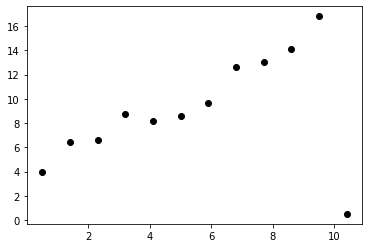

In [12]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true -O regression_outlier.mat
data = loadmat('regression_outlier.mat')
X, Y=data['x_train'], data['y_train']
fig, ax = plt.subplots()
plt.plot(X,Y,'o',color='black')



---



1.   (15pt) Solve the  above optimization problem for the given data set. You may simply use the subroutine _scipy.optimize_. Create a figure to plot the data points $\{ (x^{(i)}, y^{(i)}) \}_{i=1}^n$ and the LAD regression line. Label the axes. Briefly discuss about your findings.









[[6.05087782]
 [0.56059196]]
      fun: 23.193112846745358
 hess_inv: array([[ 1.00904328, -0.25392289],
       [-0.25392289,  0.06410122]])
      jac: array([-1.        , -2.06343198])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 468
      nit: 4
     njev: 114
   status: 2
  success: False
        x: array([4.17794712, 1.15385424])


Text(0.5, 0, 'X value')

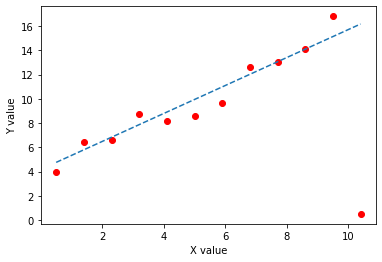

In [13]:
from scipy.optimize import minimize
## Your code starts here
# Create coefficient
X_new = np.ones((X.size,2))
X_new[:,-1:]=X
q, r = linalg.qr(X_new);
w = linalg.solve(r, q.T.dot(Y))
print(w)

# Create function
def loss(a):
  return sum(abs(Y[1:]-a[0]-a[1]*X[1:]))
res = minimize(loss,w)
print(res)

# Regression line
Ynew = res.x[1]*X+res.x[0]

# Graphing
fig, ax = plt.subplots()
ax.plot(X,Ynew,'--')
ax.scatter(X,Y,color='r')
ylabel('Y value')
xlabel('X value')



## **Your Answer**:
The regression is essentially unaffected by the outliear and thus an accurate representation of the data set.



---


2.   (10pt) Solve the corresponding least squares (LS) problem:
\begin{align*}
\min_{w_0,w_1} \; \sum_{i=1}^n (y^{(i)} - w_0 -w_1 x^{(i)})^2
  \end{align*}
  Plot the obtained least square regression line (in different style and color) in the same figure as in part 1. Briefly discuss about your findings.


Text(0.5, 0, 'X value')

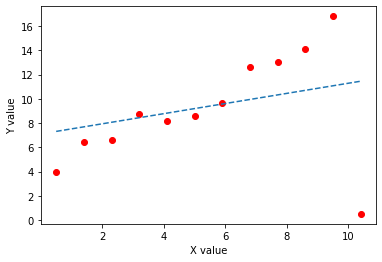

In [14]:
## Your code starts here
# Create function
def loss(a):
  return sum((Y[1:]-a[0]-a[1]*X[1:])**2)

# Get minimization results
res = minimize(loss,w)
res

# Create new line
Ynew = res.x[1]*X+res.x[0]

# Graphing
fig, ax = plt.subplots()
ax.plot(X,Ynew,'--')
ax.scatter(X,Y,color='r')
ylabel('Y value')
xlabel('X value')


## **Your Answer**: 
The regression is more bias towards the outlier when comnpared to the LAD method, not the best representation of the data.



---

